# 関数 save_fig：図の保存

In [1]:
# 2バイト文字をグラフで扱うためのパッケージインストール
!pip install japanize-matplotlib

import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0.2)

import sys
from datetime import datetime
import uuid

def dmcode():
    t = datetime.now().strftime('%f%S%M%H%d%m%Y')
    buff = ['***DMCODE', t, str(uuid.uuid4())]
    print(' '.join(buff))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=25edf45dab43009e1978508ec2d38a2527ca58410a3e1feed065b98c994883e8
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 show_silhouette：シルエット係数を可視化する

In [2]:
def show_silhouette(y_km, n_clusters, silhouette_vals, file_prefix=''):
    """シルエット図を描画する。
    Args:
        y_km (KMeans): k-meansを実行したインスタンス
        n_clusters (int): クラスタ数
        silhouette_vals (ndarray): シルエット係数の配列
    """
    plt.figure(figsize=(8, 6))
    y_ax_lower = 0 # あるクラスタラベルのシルエット係数を表示する際のY軸上の最小値
    y_ax_upper = 0 # あるクラスタラベルのシルエット係数を表示する際のY軸上の最大値
    yticks = [] # 各クラスタラベルの表示位置
    for i in range(n_clusters): # 各クラスラベルについて
        c_silhouette_vals = silhouette_vals[y_km==i] # クラスタラベルがcのシルエット係数を取り出す
        c_silhouette_vals.sort() # シルエット係数を昇順ソート
        y_ax_upper += len(c_silhouette_vals)
        plt.barh(range(y_ax_lower, y_ax_upper), # 水平方向棒グラフの描画
                 c_silhouette_vals,
                 height=1.0)
        yticks.append((y_ax_lower + y_ax_upper) / 2) # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals) # シルエット係数の平均値
    plt.axvline(silhouette_avg, color='red', linestyle='--') # シルエット係数の平均を破線で描画
    plt.yticks(yticks, range(n_clusters)) # クラスタラベルを表示
    plt.ylabel('クラスタ', fontsize=14)
    plt.xlabel('シルエット係数', fontsize=14)
    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 実習12.1：2次元データの読み込み

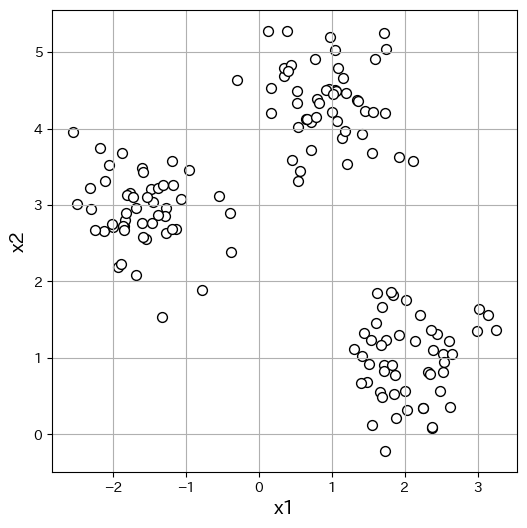

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dm12-1.csv', encoding='utf-8')
# 列x1とx2を取り出して、NumPy配列へ変換
# 2次元配列の列インデックス0にx1の値、列インデックス1にx2の値が入る
x=df[['x1','x2']].to_numpy()

# 読み込んだデータの分布を可視化
plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1],c='white', edgecolor='black',s=50)
plt.grid()
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

# 実習12.2：クラスタ数3でのクラスタリング

In [4]:
import numpy as np
from sklearn.cluster import KMeans

n_clusters = 3 # クラスタ数
# K-meansクラスインスタンス生成
km = KMeans(n_clusters=n_clusters, # クラスタ数
            init='k-means++', # クラスタ中心の初期化にK-means++を指定
            n_init=10, # 異なるクラスタ中心初期値で試行する回数
            max_iter=300, # 各試行におけるクラスタリングの最大反復数
            random_state=0)  # 乱数シードを固定

# データセットxに対するクラスタリング(fit)とクラスラベルの予測(predict)
y_km=km.fit_predict(x)

# 各クラスタに属するデータ数を表示
for i in range(n_clusters):
    n=np.sum(y_km==i)
    print(f'クラス{i}のデータ数:',n)

クラス0のデータ数: 50
クラス1のデータ数: 50
クラス2のデータ数: 50


# 実習12.3：クラスタリング結果の可視化

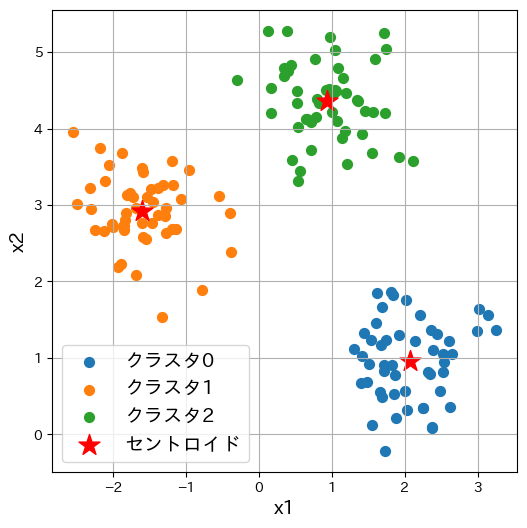

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib

def show_clusters(x,y_km,n_clusters,centers):
    """クラスタリング結果を可視化する。
    Args:
        x (ndarray): 入力データ
        y_km (ndarray): クラスラベル
        n_clusters (int): クラスタ数
        centers (ndarray): クラスタ中心
    """
    plt.figure(figsize=(6,6)) # 図のサイズ指定
    for i in range(n_clusters): # 各クラスタについてデータ点を描画
        plt.scatter(x[y_km==i,0], x[y_km==i,1], # xからクラスラベルiが割り当てられたデータを抽出
                    s=50, # マーカーサイズ
                    label=f'クラスタ{i}') # 凡例ラベル

    # クラスタ中心の描画
    plt.scatter(centers[:,0], centers[:,1],
                s=250,
                marker='*',
                label='セントロイド',
                color='red')

    plt.legend(fontsize=14)
    plt.grid()
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.show()

# 関数の外
show_clusters(x,y_km,n_clusters,km.cluster_centers_)

# 実習12.4：エルボー法による最適なクラスタ数決定

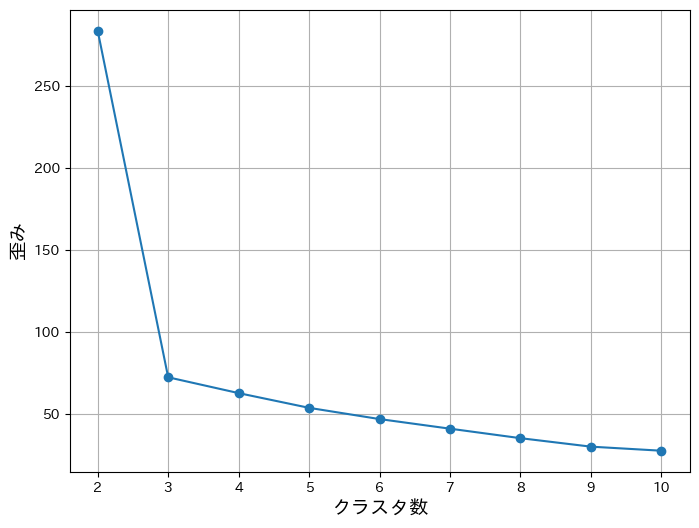

クラスタ数を1増やしたときの歪みの減少量
2 -> 3: 210.98500109212608
3 -> 4: 9.635399024544775
4 -> 5: 8.968590804111756
5 -> 6: 6.8347671537967685
6 -> 7: 5.850770020072929
7 -> 8: 5.780419383848354
8 -> 9: 5.159216428158306
9 -> 10: 2.480371029427804
最適なクラスタ数: 3


In [6]:
distortions = [] # 各クラスタ数でクラスタリングしたときの歪みを格納

for i in range(2,11): # クラスタ数2以上10以下でクラスタリング
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(x) # クラスラベルを予測
    distortions.append(km.inertia_) # 歪みをリストに追加

# クラスタ数に対する歪みをプロット
plt.figure(figsize=(8,6))
plt.plot(range(2,11), distortions, marker='o')
plt.xticks(range(2,11))
plt.xlabel('クラスタ数', fontsize=14)
plt.ylabel('歪み', fontsize=14)
plt.grid()
plt.show()
print('クラスタ数を1増やしたときの歪みの減少量')
n_clusters=np.arange(2,10) # 2以上9以下の整数
deltas=[] # クラスタ数を1増やしたときの歪みの減少量を格納
for i,c in enumerate(n_clusters): # 1
    # クラスタ数をiからi+1へ増やしたときの歪みの減少量
    d=distortions[i] - distortions[i+1]
    print(f'{c} -> {c+1}: {d}')
    deltas.append(d)

deltas=np.array(deltas)
# 配列deltasから値が最大となるインデックスを求める
# そのインデックスに対応するクラスタ数をn_clustersから求める
opt_clusters=n_clusters[np.argmax(deltas)+1]
print('最適なクラスタ数:', opt_clusters)

# 実習12.5：シルエット分析

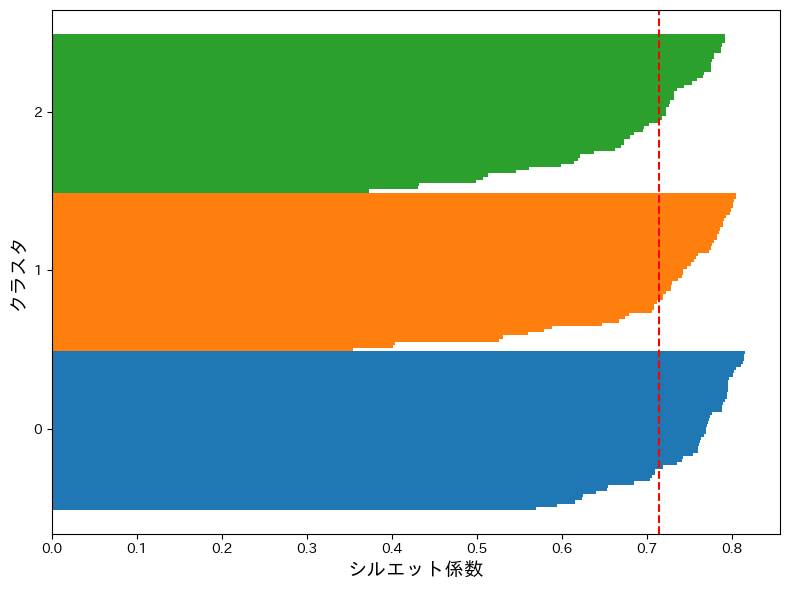

In [7]:
import numpy as np
from sklearn.metrics import silhouette_samples

# 最適なクラスタ数でクラスタリング
km = KMeans(n_clusters=opt_clusters,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km=km.fit_predict(x)

# 各データ点についてシルエット係数を計算
# metric='euclidean': データ点同士の距離をユークリッド距離で計算
silhouette_vals=silhouette_samples(x,y_km,metric='euclidean')
# 関数 show_silhouetteを呼び出して、シルエット図を作成
show_silhouette(y_km,opt_clusters,silhouette_vals)

# 実習12.6：ワインデータセットのクラスタリング
- ワインデータセットの説明変数を使い、クラスタリングを行う。
- 説明変数は前処理として標準化する。
- 最適なクラスタ数をエルボー法で決定する。
- 最適なクラスタ数の結果に対して、シルエット図を作成する。

***DMCODE 57941413220318122023 05d95f86-4315-467b-8a2a-5529ff27252c


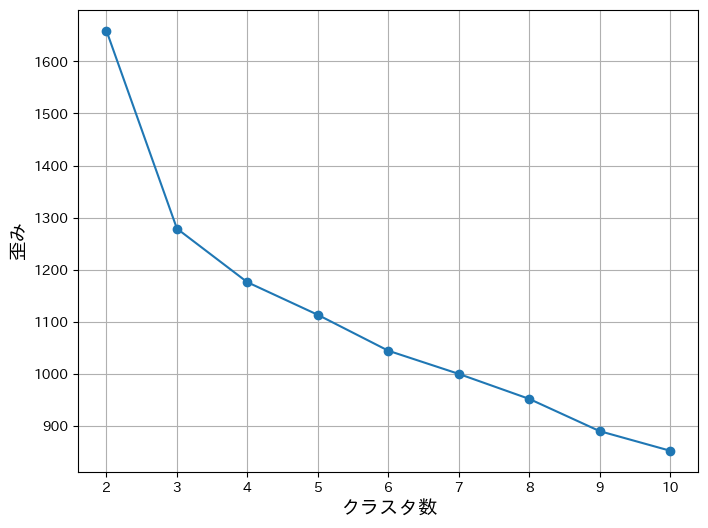

クラスタ数を1増やしたときの歪みの減少量
2 -> 3: 380.2471908843354
3 -> 4: 103.05558354710274
4 -> 5: 62.68431065150298
5 -> 6: 68.94283285416554
6 -> 7: 44.52868068771306
7 -> 8: 48.05763022496183
8 -> 9: 61.96076047644283
9 -> 10: 37.649592776630584
最適なクラスタ数: 3


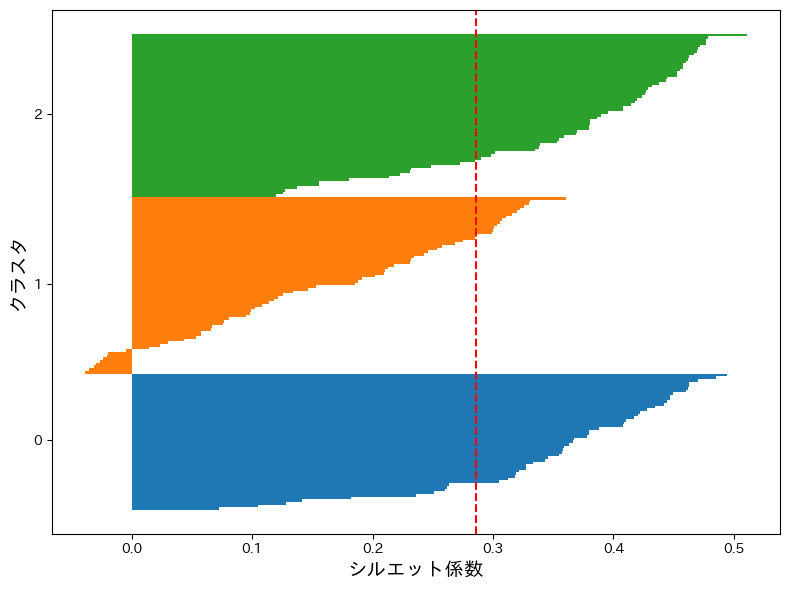

In [8]:
dmcode()

# これ以降にコードを記述すること
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('dm12-2.csv', encoding='utf-8')
feature_names = list(df2.columns)
feature_names.remove('target')
x=df2[feature_names].to_numpy()
scaler=StandardScaler()
x=scaler.fit_transform(x)

distortions = [] # 各クラスタ数でクラスタリングしたときの歪みを格納

for i in range(2,11): # クラスタ数2以上10以下でクラスタリング
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(x) # クラスラベルを予測
    distortions.append(km.inertia_) # 歪みをリストに追加

# クラスタ数に対する歪みをプロット
plt.figure(figsize=(8,6))
plt.plot(range(2,11), distortions, marker='o')
plt.xticks(range(2,11))
plt.xlabel('クラスタ数', fontsize=14)
plt.ylabel('歪み', fontsize=14)
plt.grid()
plt.show()
print('クラスタ数を1増やしたときの歪みの減少量')
n_clusters=np.arange(2,10) # 2以上9以下の整数
deltas=[] # クラスタ数を1増やしたときの歪みの減少量を格納
for i,c in enumerate(n_clusters): # 1
    # クラスタ数をiからi+1へ増やしたときの歪みの減少量
    d=distortions[i] - distortions[i+1]
    print(f'{c} -> {c+1}: {d}')
    deltas.append(d)

deltas=np.array(deltas)
# 配列deltasから値が最大となるインデックスを求める
# そのインデックスに対応するクラスタ数をn_clustersから求める
opt_clusters=n_clusters[np.argmax(deltas)+1]
print('最適なクラスタ数:', opt_clusters)

import numpy as np
from sklearn.metrics import silhouette_samples

# 最適なクラスタ数でクラスタリング
km = KMeans(n_clusters=opt_clusters,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km=km.fit_predict(x)

# 各データ点についてシルエット係数を計算
# metric='euclidean': データ点同士の距離をユークリッド距離で計算
silhouette_vals=silhouette_samples(x,y_km,metric='euclidean')
# 関数 show_silhouetteを呼び出して、シルエット図を作成
show_silhouette(y_km,opt_clusters,silhouette_vals)